In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def load_dataset(file: str):
    dataFrame = pd.read_csv(file)

    return dataFrame


data = load_dataset("data/Titanic-Dataset.csv")
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
print(data.isna().sum())
data.describe()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


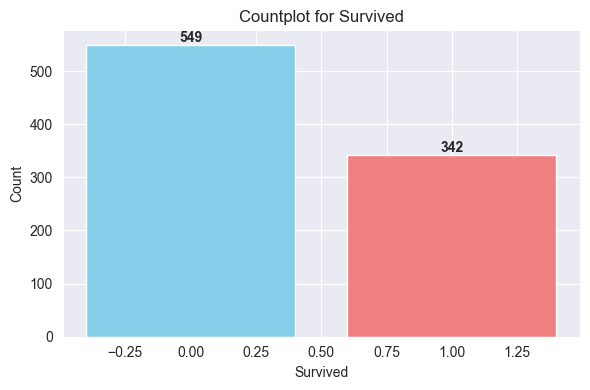

In [41]:
survived_counts = data['Survived'].value_counts()
categories = survived_counts.index
counts = survived_counts.values

# define colors for each bar
colors = ['skyblue', 'lightcoral']

# create a bar plot with different colors
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, counts, color=colors)

# Annotate bars with count values
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1,
             f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Countplot for Survived')
plt.tight_layout()

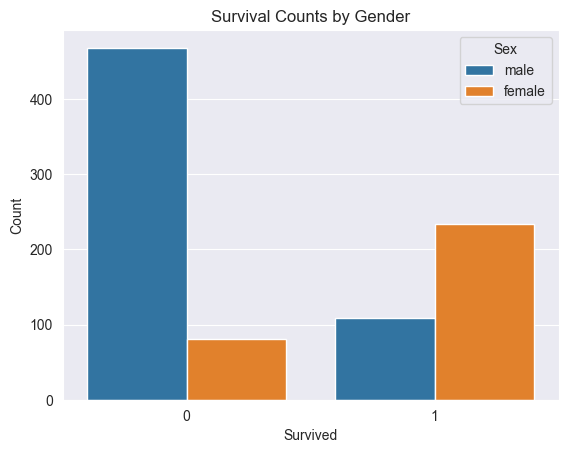

In [42]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Counts by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

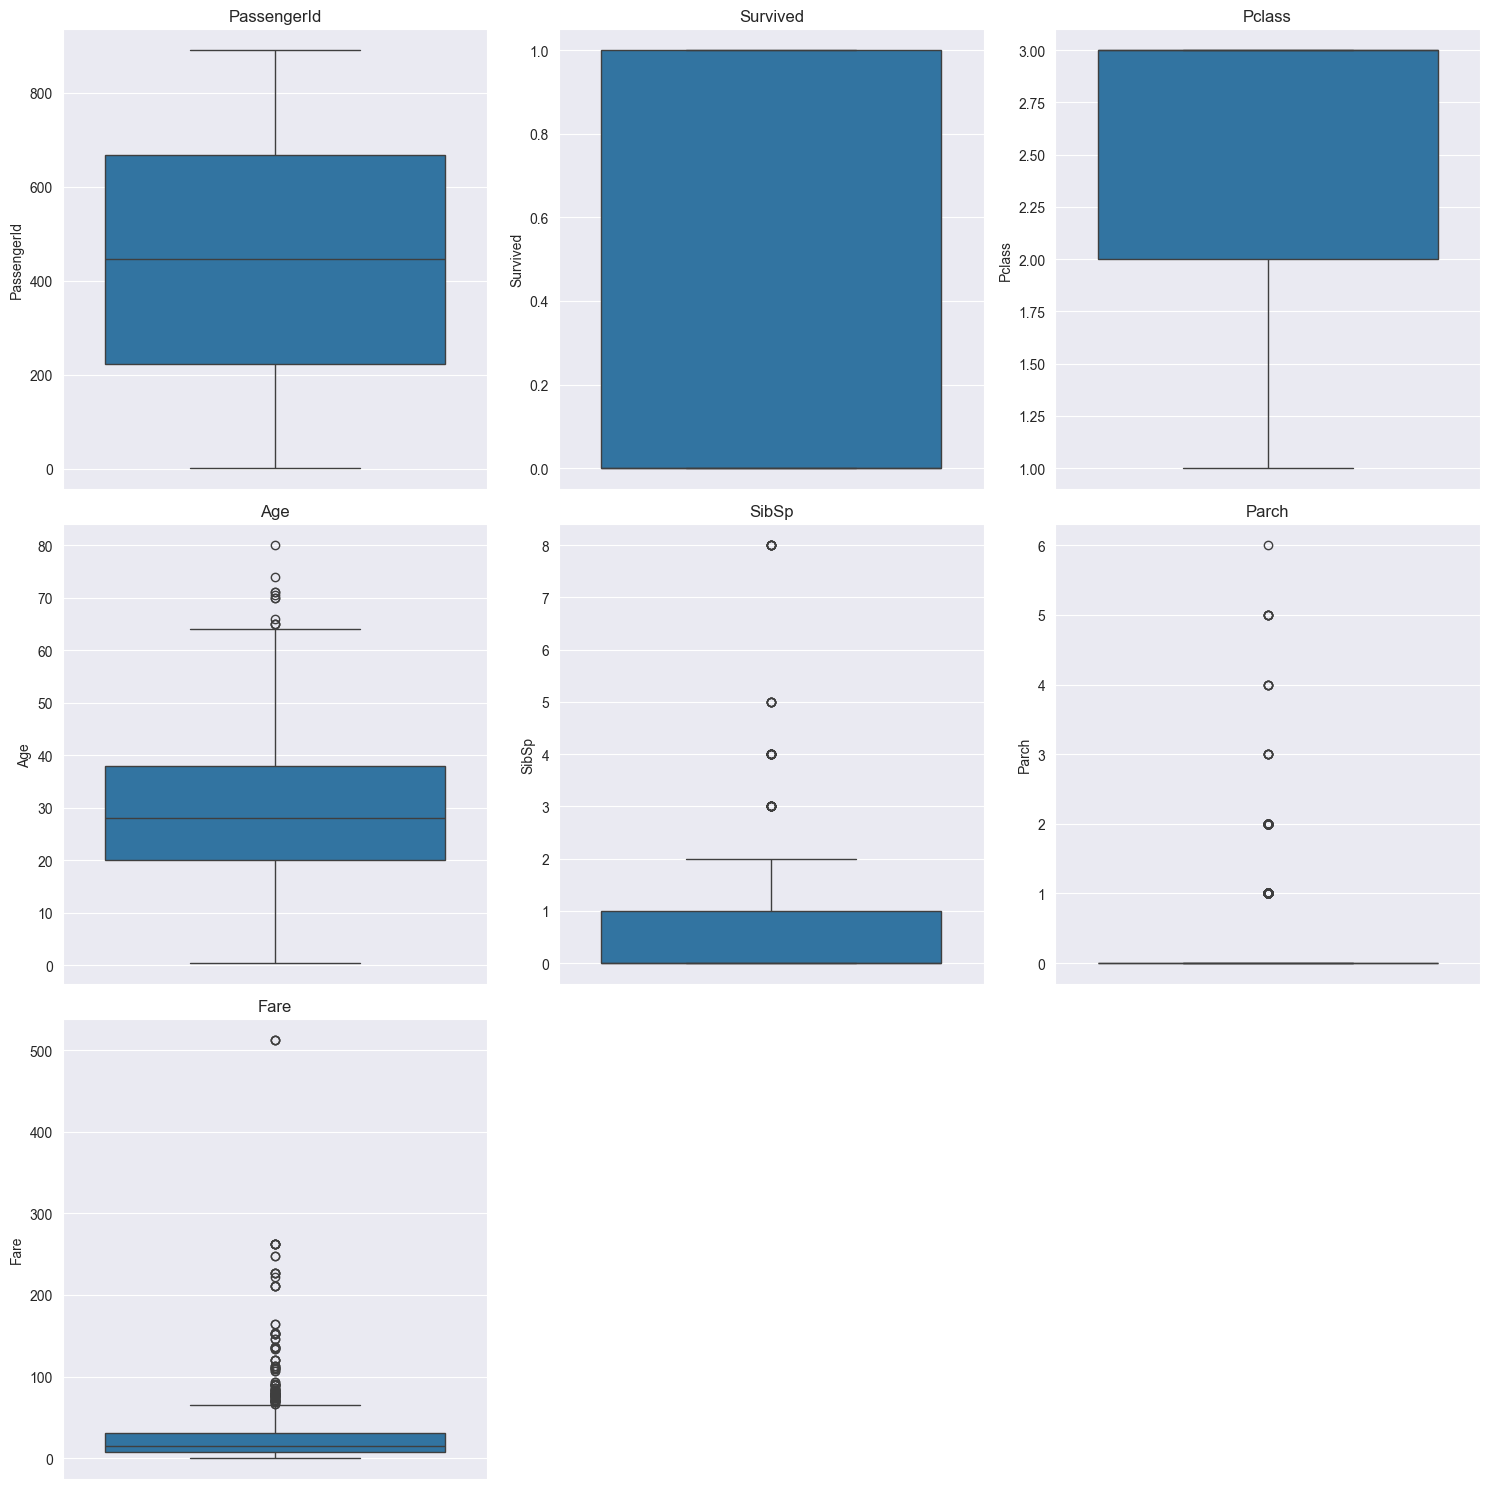

In [43]:
from utils import plot_outlier_boxplots

# plot boxplots to visualize outliers
plot_outlier_boxplots(data)

In [44]:
from utils import replace_missing_values, split_data_train_test, split_data_num_cat, encode_categorical, scale_features


def process_data(data: pd.DataFrame) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    # drop columns that are not needed
    data_cleaned = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

    data_filled = replace_missing_values(data_cleaned)

    X = data_filled.drop('Survived', axis=1).copy()
    y = data_filled['Survived'].copy()

    # split data into training and testing sets
    X_train, y_train, X_test, y_test = split_data_train_test(X, y)

    # split data into numerical and categorical
    X_train_numerical, X_train_categorical = split_data_num_cat(X_train)
    X_test_numerical, X_test_categorical = split_data_num_cat(X_test)

    # encode categorical variables
    X_train_encoded, X_test_encoded = encode_categorical(X_train_categorical, X_test_categorical, ['Sex', 'Embarked'])

    # scale features
    X_train_scaled, X_test_scaled = scale_features(X_train_numerical, X_test_numerical)

    # create final datasets
    X_train = pd.concat([X_train_scaled, X_train_encoded], axis=1)
    X_test = pd.concat([X_test_scaled, X_test_encoded], axis=1)

    # transform to numpy arrays
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()

    # add intercept to X_train and X_test
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = process_data(data)

print('The shape of the training set is:')
print(X_train.shape, y_train.shape)
print('The shape of the test set is:')
print(X_test.shape, y_test.shape)

The shape of the training set is:
(712, 11) (712,)
The shape of the test set is:
(179, 11) (179,)


In [66]:
import import_ipynb
from logistic_regression import evaluate_algorithm, cross_validate_logistic_regression, Regularization, bagging_logistic_regression

# TRAIN AND TEST ALGORITHM

w = np.random.randn(X_train.shape[1])
alpha = 0.001
no_iterations = 100
lambdas = [0.001, 0.01, 0.1, 1, 10]
regularization = Regularization.ELASTIC_NET
best_lambda = cross_validate_logistic_regression(X_train,
                                                 y_train,
                                                 lambdas,
                                                 alpha,
                                                 no_iterations,
                                                 regularization,
                                                 k=5)

print(f'Best found lambda for regularization is {best_lambda}')

Best found lambda for regularization is 0.001


Stochastic Gradient Descent average cost on test: 0.39662143667700167
Stochastic Gradient Descent accuracy on test: 0.8324022346368715
Stochastic Gradient Descent precision on test: 0.7931034482758621
Stochastic Gradient Descent recall on test: 0.71875
Stochastic Gradient Descent F1 Score on test: 0.7540983606557378


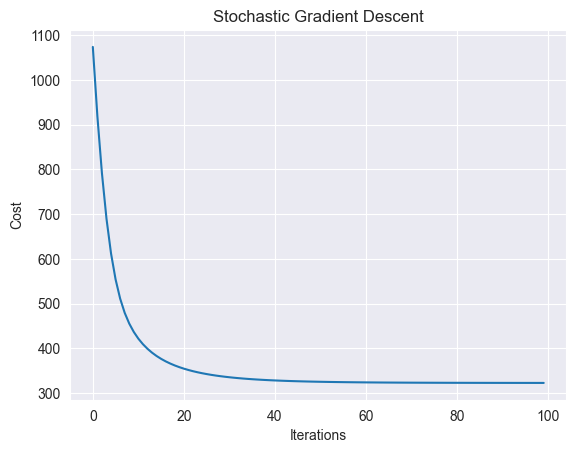

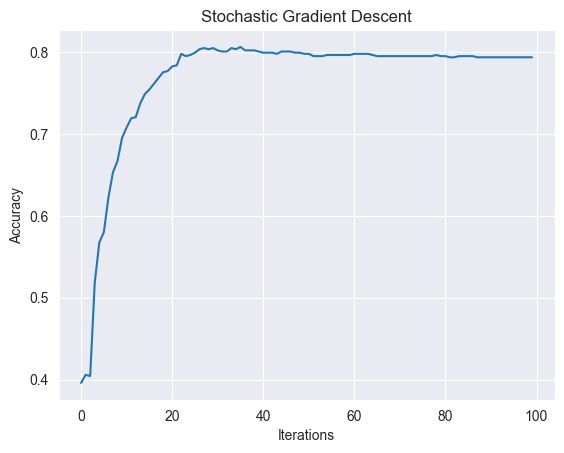

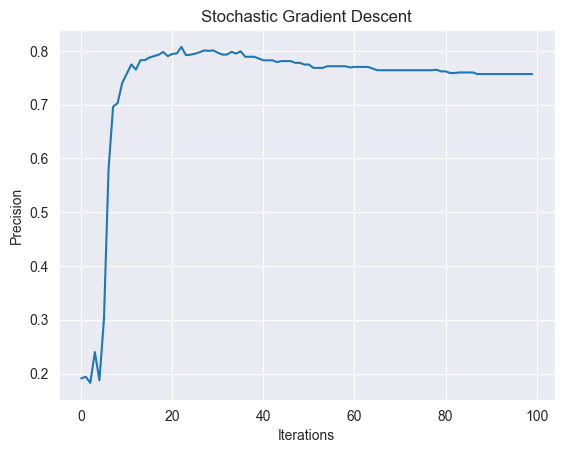

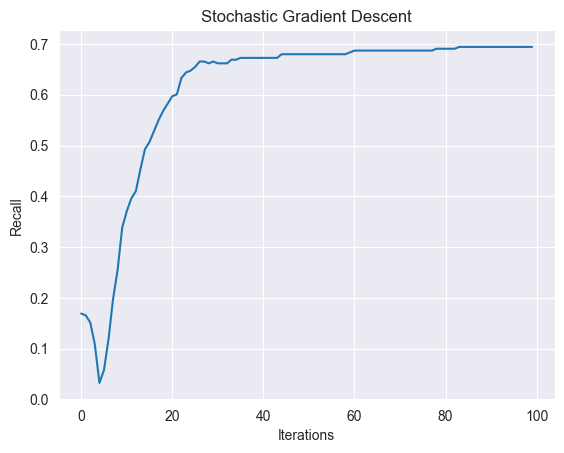

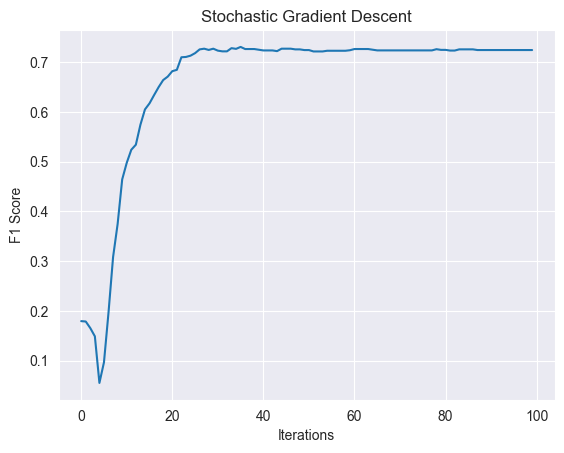

Accuracy of the bagging classifier is: 0.8324022346368715
Finish


In [67]:
# evaluate_algorithm(X_train, y_train, X_test, y_test, w, alpha, no_iterations)
evaluate_algorithm(X_train, y_train, X_test, y_test, w, alpha, no_iterations, regularization, best_lambda)

# BAGGING
n_estimators = 10
# final_predictions = bagging_logistic_regression(X_train, y_train, X_test,y_test, n_estimators, alpha, no_iterations)
final_predictions = bagging_logistic_regression(X_train, y_train, X_test, y_test, n_estimators, alpha, no_iterations, regularization, best_lambda)

# evaluate the final predictions
accuracy = np.mean(final_predictions)
print(f'Accuracy of the bagging classifier is: {accuracy}')

print('Finish')